# P-v plots

In this notebook, I shall attempt to work out how to generate p-v plots in first the inert case, before extending to the reactive case.

## Inert case

In [36]:
from r3d2 import eos_defns, State, RiemannProblem
from matplotlib import pyplot as plt
% matplotlib inline
import numpy as np
from scipy.optimize import brentq
from IPython.display import display_png

In [155]:
gamma = 5.0/3.0
eos = eos_defns.eos_gamma_law(gamma)
test_1_U_left = State(10.0, 0.0, 0.0, 2.0, eos, label="L")
test_1_U_right = State(1.0, 0.0, 0.0, 0.5, eos, label="R")


test_1_rp = RiemannProblem(test_1_U_left, test_1_U_right)

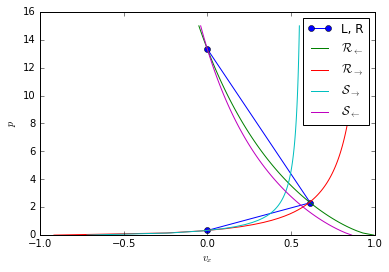

In [162]:
# shock curves 
def taub(h, gamma, p, state_a):
    return h**2 * (1 + (gamma-1) * (state_a.p-p) / (gamma * p)) - h * (gamma-1) * (state_a.p-p) / \
           (gamma*p) + state_a.h * (state_a.p-p) / state_a.rho - state_a.h**2
    
def shock_vs(gamma, p, state_a):
    h = brentq(taub, state_a.h*0.1, state_a.h*10, args=(gamma, p, state_a))
    K = state_a.p/state_a.rho**gamma
    rho = (p/K)**(1/gamma)
    j = np.sqrt((state_a.p - p) / ((state_a.h**2-h**2)/(state_a.p-p) - 2*state_a.h/state_a.rho))
    
    # find Lorentz factor of shock
    vsp = (state_a.rho**2 * state_a.W_lorentz**2 * state_a.v + \
          j**2 * np.sqrt(1 + state_a.rho**2 * state_a.W_lorentz**2 * (1-state_a.v**2)/j**2)) / \
          (state_a.rho**2 * state_a.W_lorentz*2 + j**2)
    vsm = (state_a.rho**2 * state_a.W_lorentz**2 * state_a.v - \
          j**2 * np.sqrt(1 + state_a.rho**2 * state_a.W_lorentz**2 * (1-state_a.v**2)/j**2)) / \
          (state_a.rho**2 * state_a.W_lorentz*2 + j**2)
    
    return (state_a.h * state_a.W_lorentz * state_a.v + (p-state_a.p)/(j*np.sqrt(1-vsp**2))) / \
           (state_a.h*state_a.W_lorentz + \
         (p-state_a.p) * (1/(state_a.rho*state_a.W_lorentz) + state_a.v/(j * np.sqrt(1-vsp**2)))), \
           (state_a.h * state_a.W_lorentz * state_a.v - (p-state_a.p)/(j*np.sqrt(1-vsm**2))) / \
           (state_a.h*state_a.W_lorentz + \
         (p-state_a.p) * (1/(state_a.rho*state_a.W_lorentz) - state_a.v/(j * np.sqrt(1-vsm**2))))
    
    

# rarefaction curves
def vpm(gamma, eos, p, state_a):
    cs = find_cs(gamma, p, state_a)
    cs_a = eos['cs_from_rho_eps'](state_a.rho, state_a.eps)
    A = (np.sqrt(gamma-1) - cs) * (np.sqrt(gamma-1) + cs_a) / ((np.sqrt(gamma-1) + cs) * (np.sqrt(gamma-1) - cs_a))
    
    Ap, Am = A**(2 / np.sqrt(gamma-1)), A**(-2 / np.sqrt(gamma-1))
    
    va = state_a.v
    
    vp = ((1+va) * Ap - (1-va)) / ((1+va) * Ap + (1-va))
    vm = ((1+va) * Am - (1-va)) / ((1+va) * Am + (1-va))
    
    return vp, vm

def find_cs(gamma, p, state_a):
    return np.sqrt(gamma*(gamma-1)*p / ((gamma-1) *state_a.rho * (p/state_a.p)**(1/gamma) + gamma*p))

def plot_pvx(rp, gamma, eos):
    # find p, vxs of states in wave 
    ps = np.array([rp.state_l.p, rp.p_star, rp.state_r.p])
    #ps = np.array([wave.q_l.p for wave in rp.waves]) #, rp.waves[-1].q_r.p]
    #p2s = np.array([wave.q_r.p for wave in rp.waves]) 
    vxs = np.array([rp.state_l.v, rp.state_star_r.v, rp.state_r.v])
    #vxs = np.array([wave.q_l.v for wave in rp.waves])
    #vx2s = np.array([wave.q_r.v for wave in rp.waves])
    
    # temp array of test ps 
    vr = rp.waves[0].wavespeed[0]
    test_ps = np.linspace(0.0001, 15.0, num=100, endpoint=True)
    test_vps, test_vms = vpm(gamma, eos, test_ps, rp.waves[0].q_l)#-vr
    _, test_vms = vpm(gamma, eos, test_ps, rp.waves[-1].q_r)#-vr
    
    # shock speed
    test_vs = np.array([shock_vs(gamma, p, rp.waves[-1].q_r)[0] for p in test_ps])#+vs
    test_vs2 = np.array([shock_vs(gamma, p, rp.waves[0].q_l)[1] for p in test_ps])#+vs

    plt.plot(vxs, ps, '-o', test_vps, test_ps, test_vms, test_ps, test_vs, test_ps, test_vs2, test_ps)
    plt.xlabel(r'$v_x$')
    plt.ylabel(r'$p$')
    plt.xlim([-0.2, 1.])
    plt.legend(['L, R', r'$\mathcal{R}_\leftarrow$', r'$\mathcal{R}_\rightarrow$', r'$\mathcal{S}_\rightarrow$', r'$\mathcal{S}_\leftarrow$'])

plot_pvx(test_1_rp, gamma, eos)


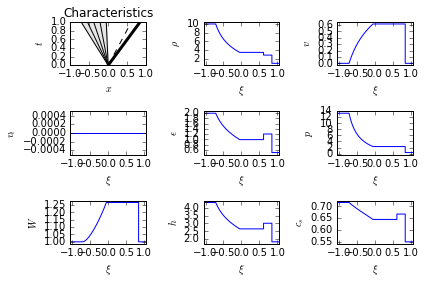

In [157]:
test_1_rp

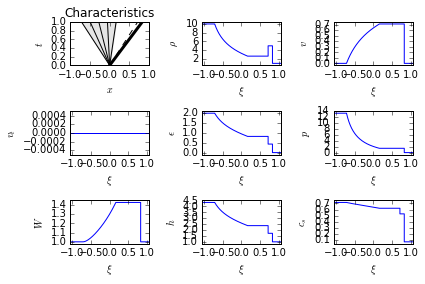

In [127]:
display_png(test_1_rp)